In [ ]:
import os
from IPython.display import display, Image
from PIL import Image as P_Image
import numpy as np
import subprocess
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

In [ ]:
! pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

In [ ]:
! python stylegan2-ada-pytorch/generate.py --outdir=/content/q1 --trunc=1 --seeds=37,73,21,19 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

In [ ]:
! python stylegan2-ada-pytorch/generate.py --outdir=/content/q2 --trunc=0.65 --seeds=219-229 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

In [ ]:
def display_png_images(folder_path):
    file_list = os.listdir(folder_path)
    png_files = [file for file in file_list if file.endswith('.png')]
    for png_file in png_files:
        file_path = os.path.join(folder_path, png_file)
        display(Image(filename=file_path))

In [ ]:
! python stylegan2-ada-pytorch/projector.py --outdir=q3 --save-video=False --target=/content/0000.jpg\
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl >/dev/null

In [ ]:
folder_path = '/content/Images'
display_resized_normalized_images(folder_path)

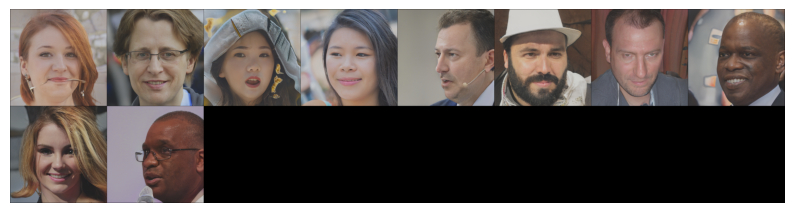

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the saved image
image_path = 'fake_images.png'

# Set the figure size
plt.figure(figsize=(10, 10))

# Display the image using matplotlib
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()


In [ ]:
folder_path = "/content/Images"
image_files = os.listdir(folder_path)
for k,image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    out_dir = f'/content/Out_{k}'
    os.makedirs(out_dir , exist_ok = True)
    command = f"python stylegan2-ada-pytorch/projector.py --outdir={out_dir} --target={image_path} --save-video=False  --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
    subprocess.run(command, shell=True)

In [ ]:
def retrieve_latent(img_path,k):
    latent_path = f'/content/Out_{k}/projected_w.npz'
    latent = np.load(latent_path)['w']
    return latent

In [ ]:
my_image_Latent_vector = '/content/Lab_Results3/projected_w.npz'
my_image_latent_vector = np.load('/content/Lab_Results3/projected_w.npz')['w']
print(image_files)
latent_vectors = []
for i,filename in enumerate(image_files):
    if i <5:
        image_path = os.path.join(folder_path, filename)
        latent_vector = retrieve_latent(image_path, i)
        latent_vectors.append(latent_vector)

In [ ]:
my_image_Latent_vector = '/content/Lab_Results3/projected_w.npz'
my_image_latent_vector = np.load('/content/Lab_Results3/projected_w.npz')['w']
print(image_files)
latent_vectors = []
for i,filename in enumerate(image_files):
    if i <5:
        image_path = os.path.join(folder_path, filename)
        latent_vector = retrieve_latent(image_path, i)
        latent_vectors.append(latent_vector)

In [ ]:
def lin_interpolation(latent_vector1, latent_vector2, num_steps):
    alpha_values = np.linspace(0, 1, num_steps)
    interpolated_latent_vectors = []
    for alpha in alpha_values:
        interpolated_latent_vector = (1 - alpha) * latent_vector1 + alpha * latent_vector2
        interpolated_latent_vectors.append(interpolated_latent_vector)
    return interpolated_latent_vectors

In [ ]:
num_steps = 10  # Number of interpolation steps
num_images = len(latent_vectors)
interpolated_latent_vectors_list = []
for i in range(num_images):
    interpolated_latent_vectors = lin_interpolation(latent_vectors[i], my_image_latent_vector , num_steps)
    print(len(interpolated_latent_vectors))
    interpolated_latent_vectors_list.append(interpolated_latent_vectors)

In [ ]:
for i in range(5):
    for j in range(10):
        latent = interpolated_latent_vectors_list[i][j]
        out_dir = f'/content/Lab_Results5/in_{i}'
        sv_dir = f'/content/Lab_Results6/in_{i}'
        os.makedirs(sv_dir , exist_ok = True)
        os.makedirs(out_dir , exist_ok = True)
        addr = f'{sv_dir}/proj_{j}.npz'
        np.savez(addr, w=latent)

In [ ]:
! python stylegan2-ada-pytorch/generate.py --outdir=/content/ --projected-w=/content/q3/projected_w.npz\
--network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

In [ ]:
def display_images_in_folders(main_folder_path):
    subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir()]
    for subfolder in subfolders:
        files = os.listdir(subfolder)
        if len(files) != 1:
            continue

        image_file_path = os.path.join(subfolder, files[0])

        image = P_Image.open(image_file_path)
        plt.imshow(image)
        plt.title(subfolder.split('/')[-1])
        plt.axis('off')
        plt.show()


In [ ]:
main_folder_path = '/content/q5/in_0'
display_images_in_folders(main_folder_path)